<a href="https://colab.research.google.com/github/BhojRajBist/BhojRajBist/blob/main/GNSS_DATA_Processing_using_Georinex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install georinex

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.8/59.8 kB 726.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.0/76.0 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 45.4 MB/s eta 0:00:00


In [2]:
import georinex as gr

In [3]:
obs = gr.load('/content/drive/MyDrive/GNSS/DOC-20231214-WA0000 (1)/reachqbase_raw_20231214093229.23O')
#/content/drive/MyDrive/GNSS/DOC-20231214-WA0000 (1)/reachqbase_raw_20231214093229.23O
#this is path to the data

In [5]:
obs.to_netcdf('process.nc', group='OBS')

#After running this code, you should have a NetCDF file named 'process.nc'
#with your GNSS observation data stored in the 'OBS' group.
#You can then use this NetCDF file for further analysis or share it with others
 #who can load the data back into an xarray.Dataset using xr.open_dataset('process.nc', group='OBS').

In [10]:
pip install xarray pymap3d
#xarray to handle and analyze multi-dimensional datasets, including GNSS observation data.
#pymap3d can be handy when you need to perform coordinate transformations, for example, converting geodetic coordinates
 #(latitude, longitude, altitude) to Cartesian coordinates (ECEF) or vice versa.

SyntaxError: invalid syntax (<ipython-input-10-06043587e079>, line 1)

In [11]:
hdr = gr.rinexheader('/content/drive/MyDrive/GNSS/DOC-20231214-WA0000 (1)/reachqbase_raw_20231214093229.23O')

In [12]:
print(hdr)
#print the header of the obs file

{'version': 3.03, 'filetype': 'O', 'rinextype': 'obs', 'systems': 'M', 'PGM / RUN BY / DATE': 'Emlid RGL 1.2.5                         20231214 100248 UTC ', 'COMMENT': 'format: u-blox                                              ', 'MARKER NAME': 'Cp1                                                         ', 'MARKER NUMBER': '                                                            ', 'MARKER TYPE': '                                                            ', 'OBSERVER / AGENCY': '                                                            ', 'REC # / TYPE / VERS': '                    EMLID REACH RS+                         ', 'ANT # / TYPE': '                                                            ', 'APPROX POSITION XYZ': '   590181.6831  5591360.2533  3003784.6792                  ', 'ANTENNA: DELTA H/E/N': '        1.6650        0.0000        0.0000                  ', 'TIME OF FIRST OBS': '  2023    12    14     9    32   48.0000000     GPS         ', 'TIME OF LAST OB

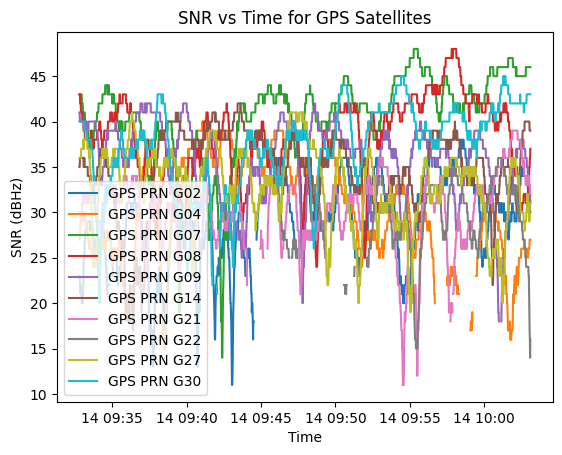

In [18]:
import matplotlib.pyplot as plt

# Extract relevant information
satellite_prns = obs_data['sv'].values
snr_data = obs_data['S1C']

# Plot SNR values
for prn in satellite_prns:
    plt.plot(obs_data['time'], snr_data.sel(sv=prn), label=f'GPS PRN {prn}')

plt.xlabel('Time')
plt.ylabel('SNR (dBHz)')
plt.legend()
plt.title('SNR vs Time for GPS Satellites')
plt.show()


The resulting plot will show how the SNR values vary over time for each GPS satellite. Each line in the plot corresponds to a different GPS satellite, identified by its PRN. The x-axis represents time, and the y-axis represents the SNR values in decibels (dBHz).


Interpreting the plot:

Higher SNR values indicate stronger and more reliable satellite signals.
Variations in SNR values may be due to factors such as satellite geometry, atmospheric conditions, or signal obstructions.

In [22]:
pip install pyproj

In [24]:

import georinex as gr
from pyproj import Proj, transform

# Given XYZ coordinates from the RINEX header
xyz_coordinates = (590181.6831, 5591360.2533, 3003784.6792)

# Define the projection systems
input_projection = Proj(init='epsg:4326')  # WGS84
output_projection = Proj(init='epsg:3857')  # Web Mercator (XYZ is similar to Web Mercator)

# Convert XYZ to geographical coordinates (latitude, longitude, altitude)
longitude, latitude, altitude = transform(output_projection, input_projection, *xyz_coordinates)

# Print the result
print(f'Latitude: {latitude} degrees')
print(f'Longitude: {longitude} degrees')
print(f'Altitude: {altitude} meters')


Latitude: 44.808094081421665 degrees
Longitude: 5.301692263361138 degrees
Altitude: 3003784.6792 meters


/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
<ipython-input-24-53c00c433076>:12: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  longitude, latitude, altitude = transform(output_p


These coordinates represent a point in geographic space using the WGS84 coordinate system,

In [34]:
from pyproj import Proj, transform

# Given coordinates
latitude = 44.808094081421665
longitude = 5.301692263361138

# Define the input projection (WGS84)
in_proj = Proj(init='epsg:4326')

# Define the output projection (UTM Zone 44N)
out_proj = Proj(init='epsg:32644')

# Convert geodetic coordinates to UTM
easting, northing = transform(in_proj, out_proj, longitude, latitude)

# Print the UTM coordinates
print("UTM Easting:", easting, "meters")
print("UTM Northing:", northing, "meters")






UTM Easting: -4882046.40585374 meters
UTM Northing: 8443538.736628585 meters


/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
<ipython-input-34-c1a7cf2c1313>:14: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  easting, northing = transform(in_proj, out_proj, l

In [35]:
import georinex as gr

# Specify the path to the RINEX file
rinex_file_path = "/content/drive/MyDrive/GNSS/DOC-20231214-WA0000 (1)/reachqbase_raw_20231214093229.23O"

# Load the RINEX file
rinex_data = gr.load(rinex_file_path)

# Display the number of satellites
num_satellites = len(rinex_data.sv)
print("Number of Satellites:", num_satellites)

# Count the number of observations for each satellite type (e.g., GPS, GLONASS)
satellite_types = rinex_data.obs.get_sv_types()
for sat_type in satellite_types:
    count = len(rinex_data.obs.filter(svtype=sat_type))
    print(f"Number of {sat_type} satellites:", count)

# Display the total number of observations
total_observations = len(rinex_data.time)
print("Total Number of Observations:", total_observations)

# Display the coordinate system
coordinate_system = rinex_data.attrs['coord_sys']
print("Coordinate System:", coordinate_system)


Number of Satellites: 31


AttributeError: 'Dataset' object has no attribute 'obs'

In [39]:
# Display the number of satellites
num_satellites = len(rinex_data.sv)
print("Number of Satellites:", num_satellites)

# Count the number of observations for each satellite type (e.g., GPS, GLONASS)
satellite_types = [sv_type.strip('0123456789') for sv_type in rinex_data.sv.values]
for sat_type in set(satellite_types):
    count = (satellite_types == sat_type).sum()
    print(f"Number of {sat_type} satellites:", count)

# Display the total number of observations
total_observations = len(rinex_data.time)
print("Total Number of Observations:", total_observations)

# Display the coordinate system
coordinate_system = rinex_data.attrs['time_system']
print("Coordinate System:", coordinate_system)


Number of Satellites: 31


AttributeError: 'bool' object has no attribute 'sum'

In [40]:
print(rinex_data)

<xarray.Dataset>
Dimensions:  (time: 1819, sv: 31)
Coordinates:
  * time     (time) datetime64[ns] 2023-12-14T09:32:48 ... 2023-12-14T10:03:06
  * sv       (sv) <U3 'C02' 'C03' 'C05' 'C06' 'C07' ... 'G27' 'G30' 'J02' 'J03'
Data variables:
    C1C      (time, sv) float64 nan nan nan ... 2.234e+07 4.128e+07 3.967e+07
    L1C      (time, sv) float64 nan nan nan ... 1.174e+08 2.169e+08 2.085e+08
    D1C      (time, sv) float64 nan nan nan nan ... 2.464e+03 333.1 -226.4
    S1C      (time, sv) float64 nan nan nan nan nan ... 16.0 31.0 43.0 37.0 34.0
    C1I      (time, sv) float64 3.67e+07 3.747e+07 3.737e+07 ... nan nan nan
    L1I      (time, sv) float64 nan 1.951e+08 1.946e+08 ... nan nan nan
    D1I      (time, sv) float64 -212.3 -181.1 -228.0 -320.0 ... nan nan nan nan
    S1I      (time, sv) float64 29.0 36.0 33.0 32.0 40.0 ... nan nan nan nan nan
Attributes:
    version:          3.03
    interval:         1.0
    rinextype:        obs
    fast_processing:  0
    time_system:      GP

In [43]:
import numpy as np

# Count the number of observations for each satellite type (e.g., GPS, GLONASS)
satellite_types = [sv_type.strip('0123456789') for sv_type in rinex_data.sv.values]
unique_sat_types = set(satellite_types)

for sat_type in unique_sat_types:
    count = np.sum(np.array(satellite_types) == sat_type)
    print(f"Number of {sat_type} satellites:", count)


Number of G satellites: 10
Number of E satellites: 5
Number of J satellites: 2
Number of C satellites: 14


G: GPS (United States)
E: Galileo (European Union)
J: QZSS (Quasi-Zenith Satellite System, Japan)
C: BeiDou (China)


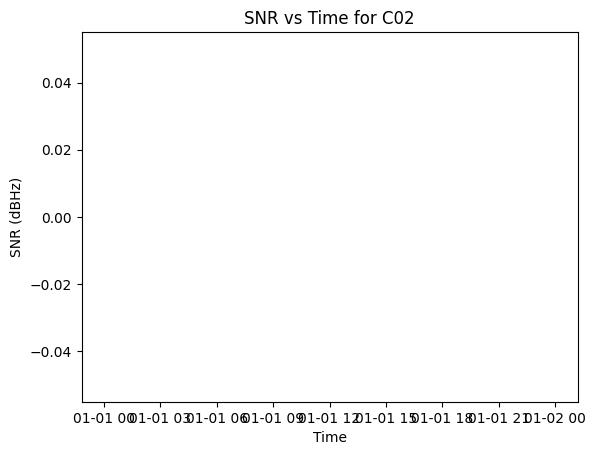

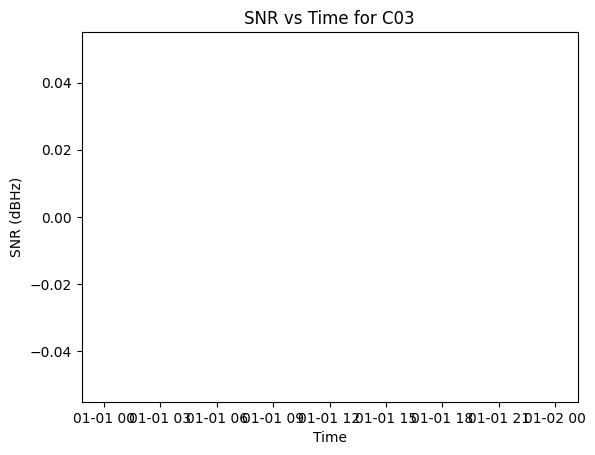

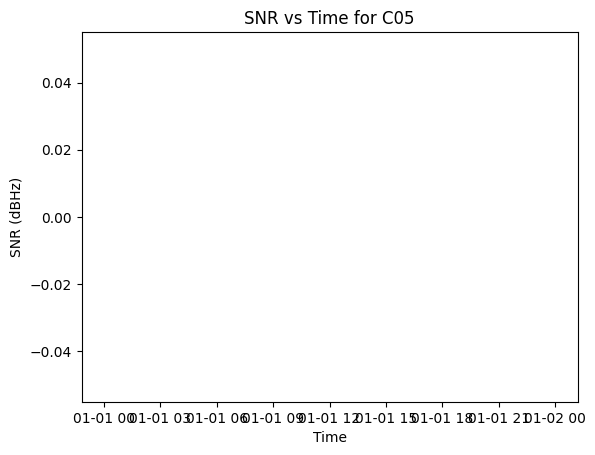

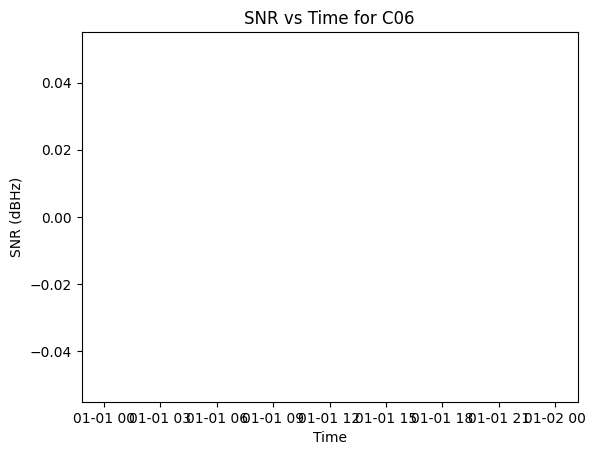

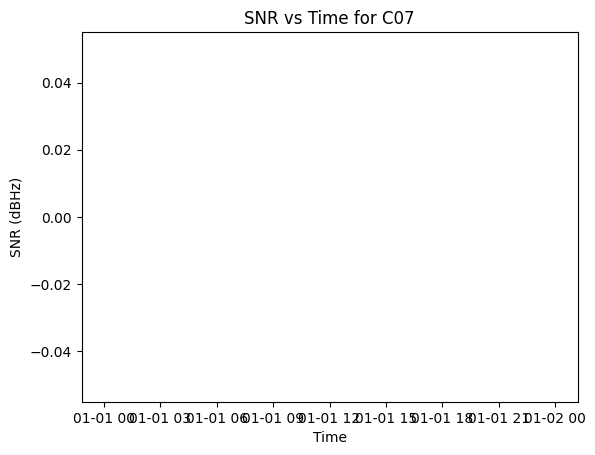

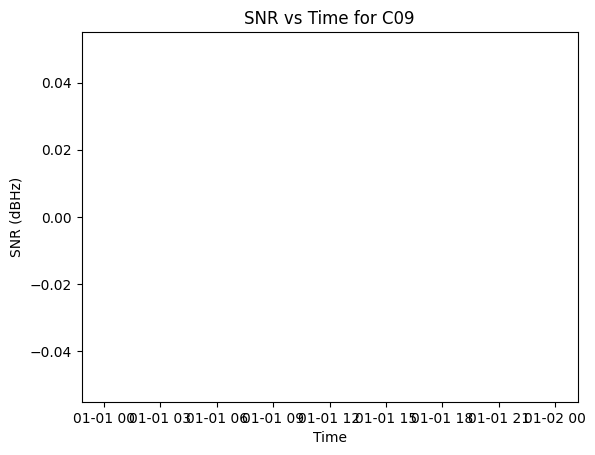

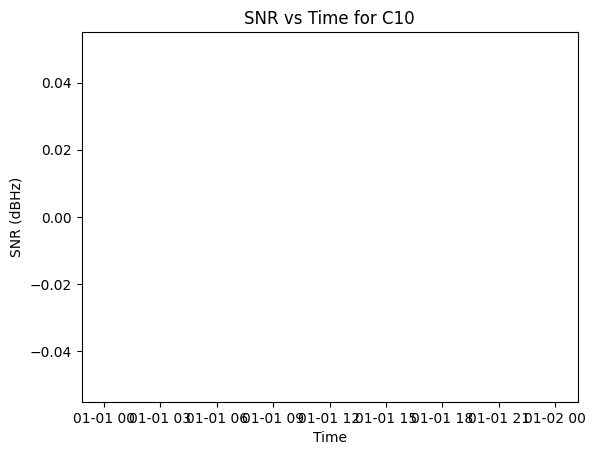

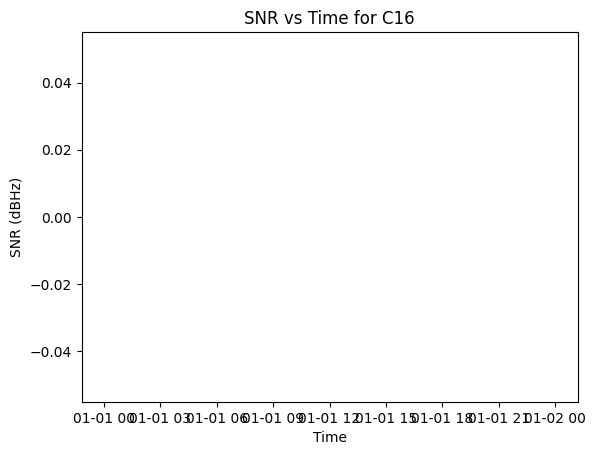

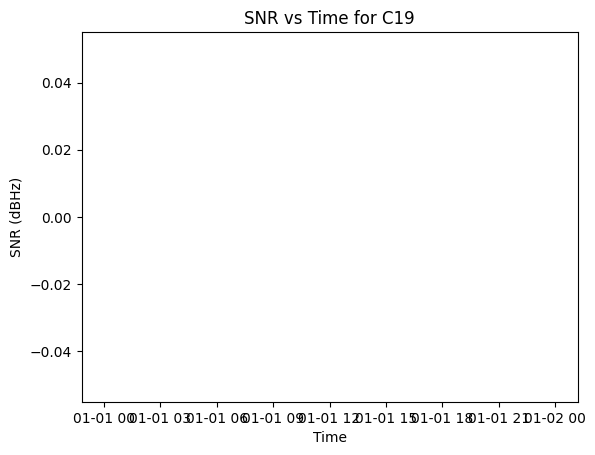

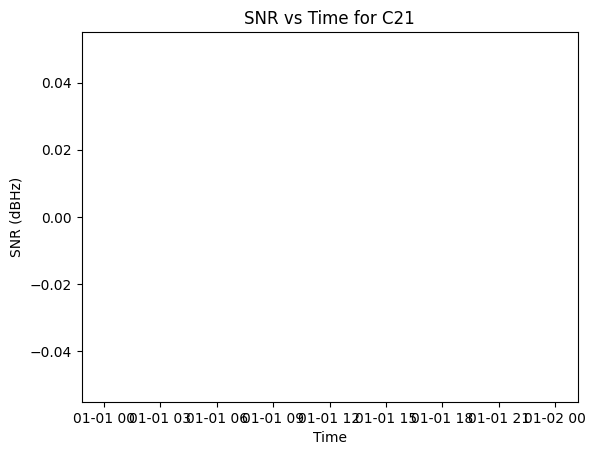

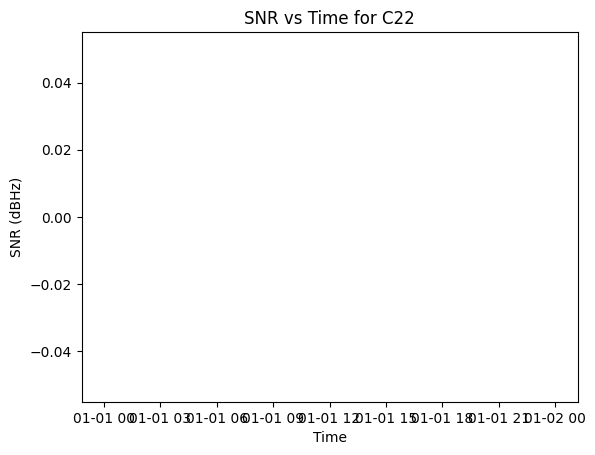

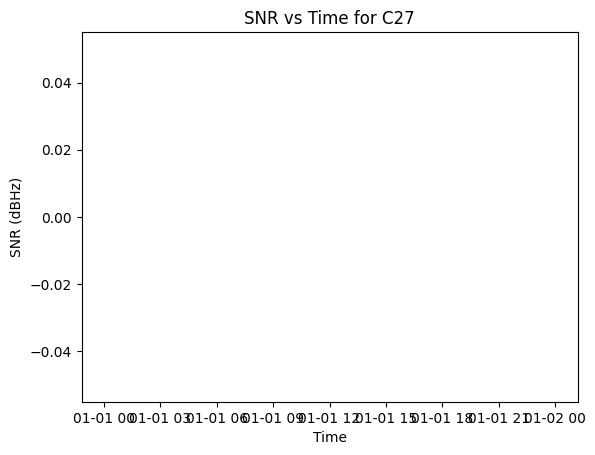

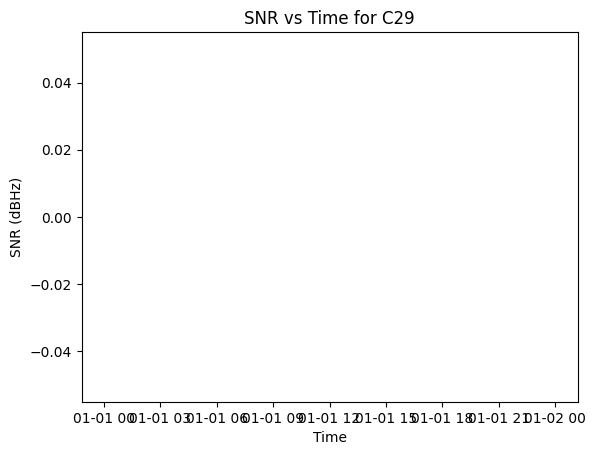

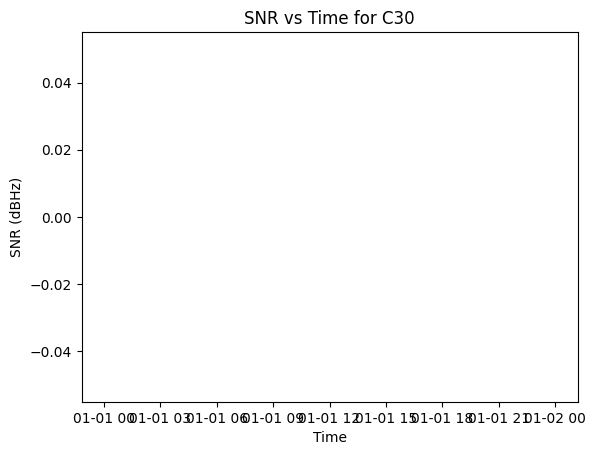

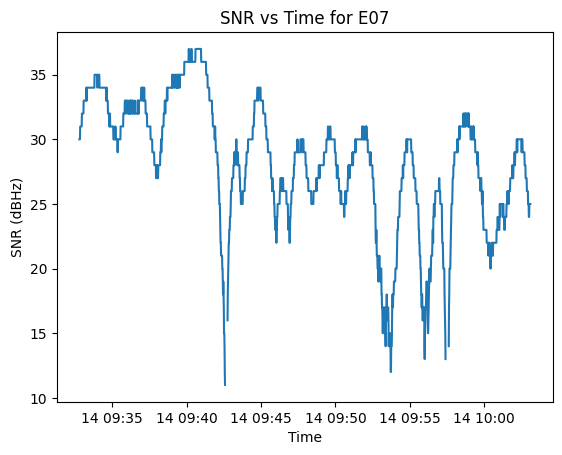

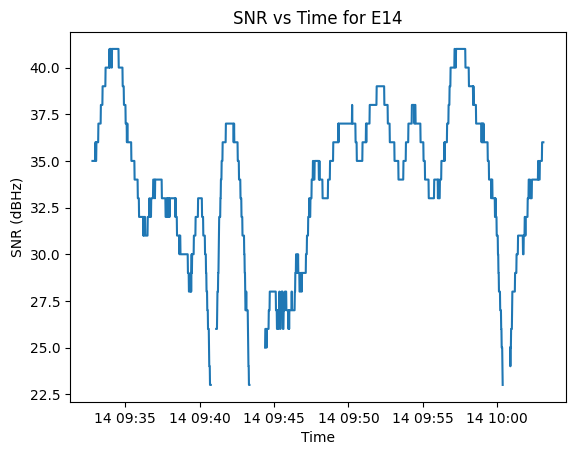

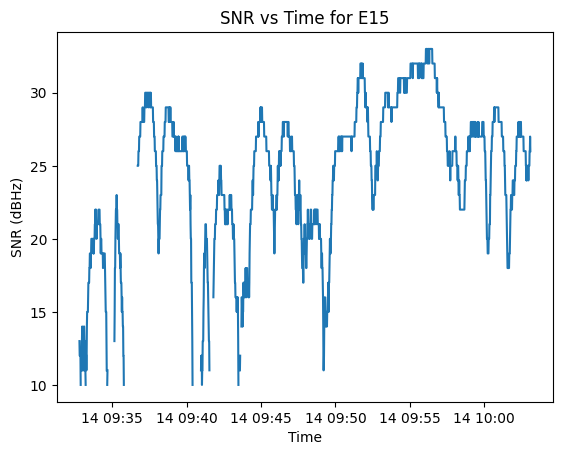

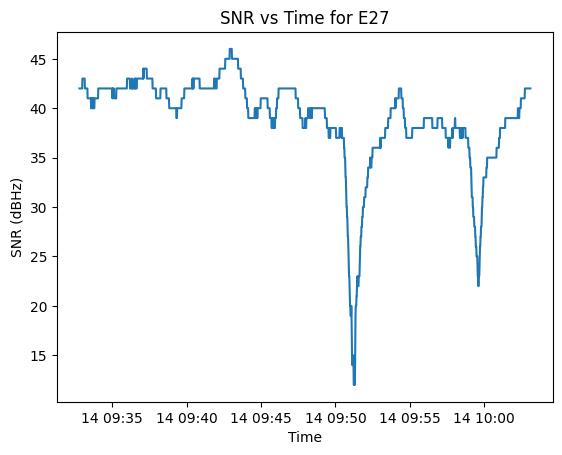

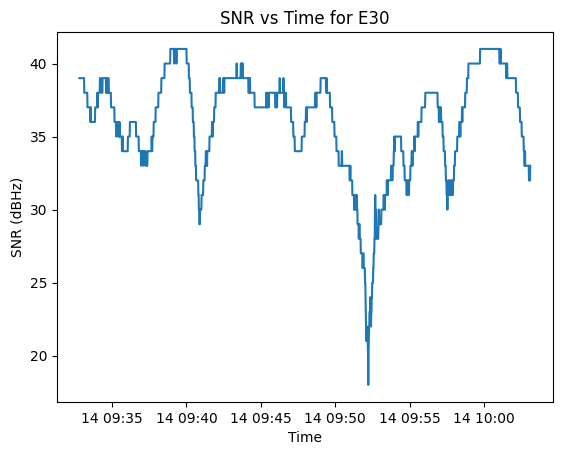

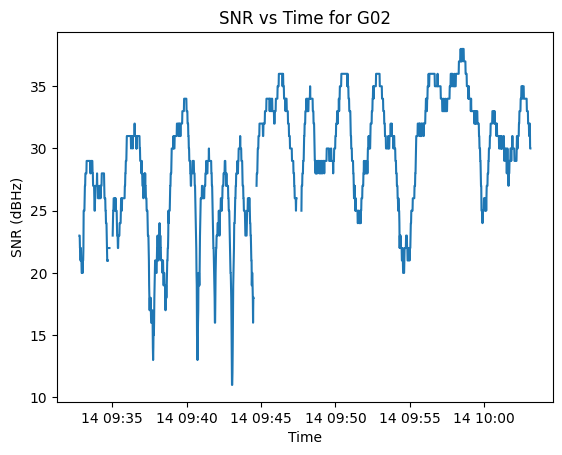

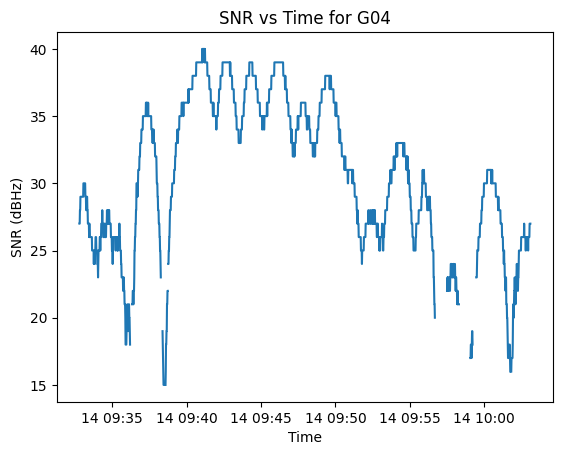

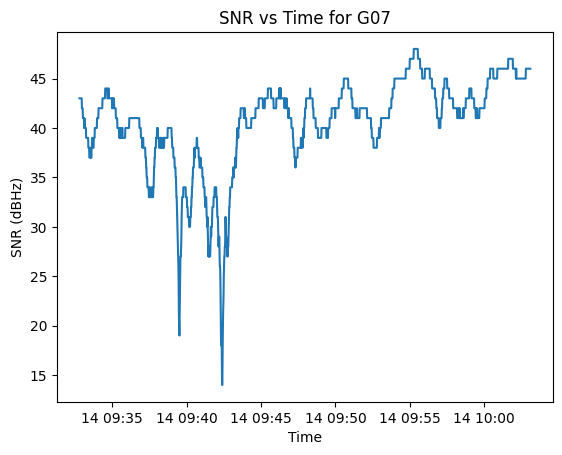

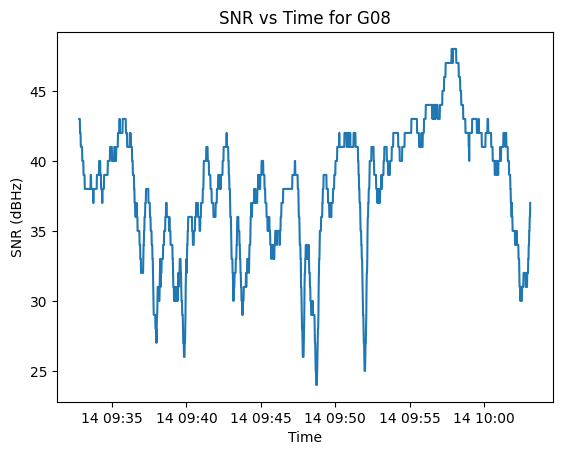

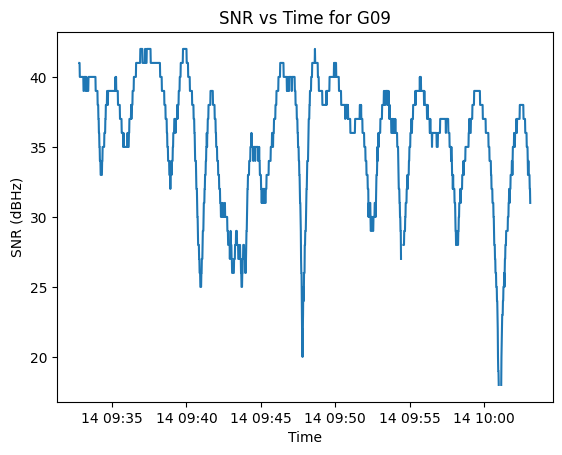

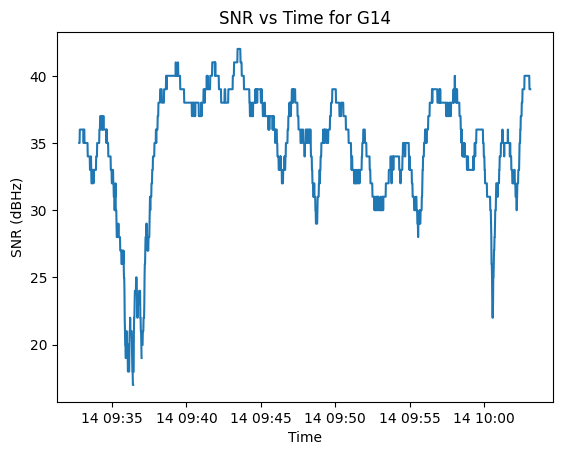

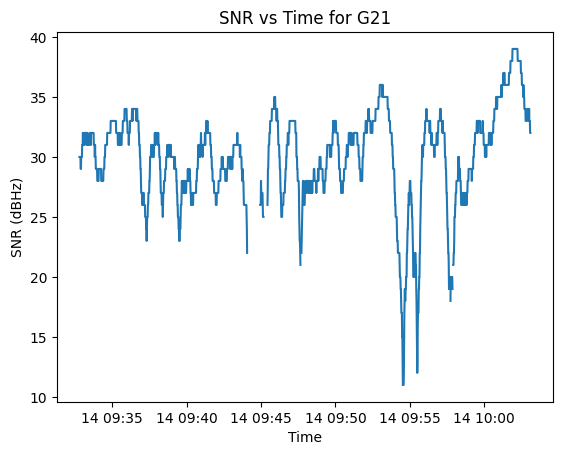

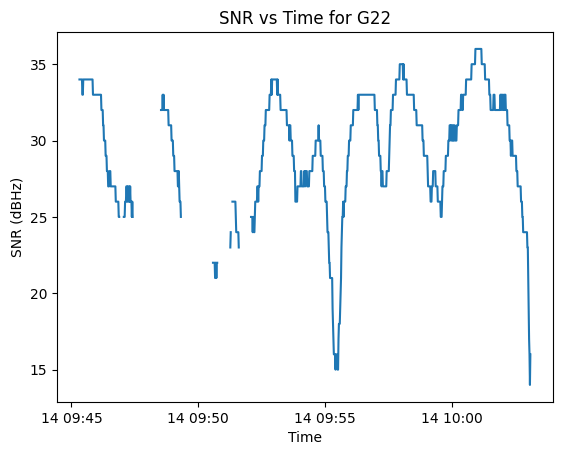

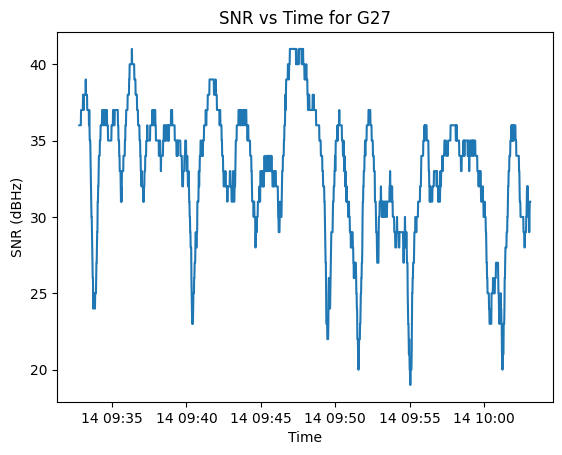

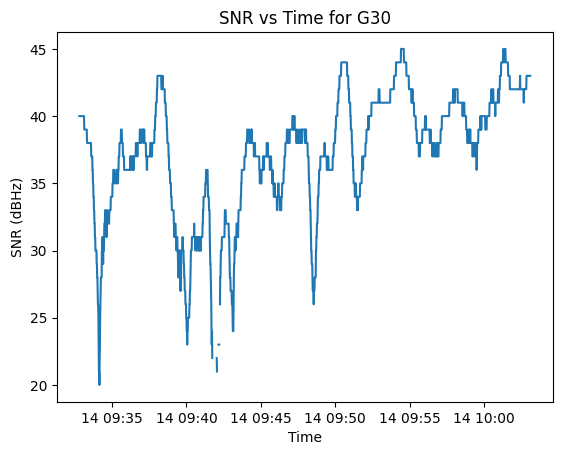

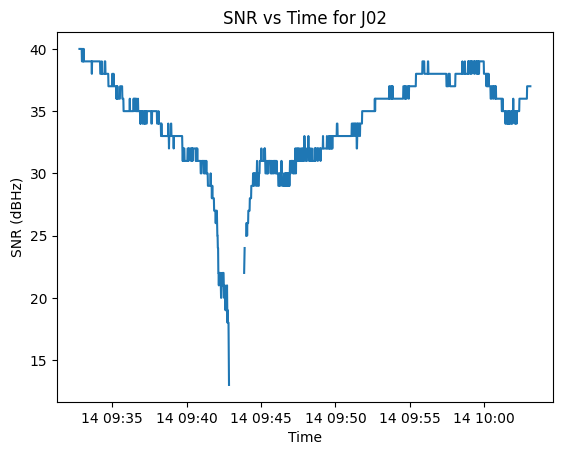

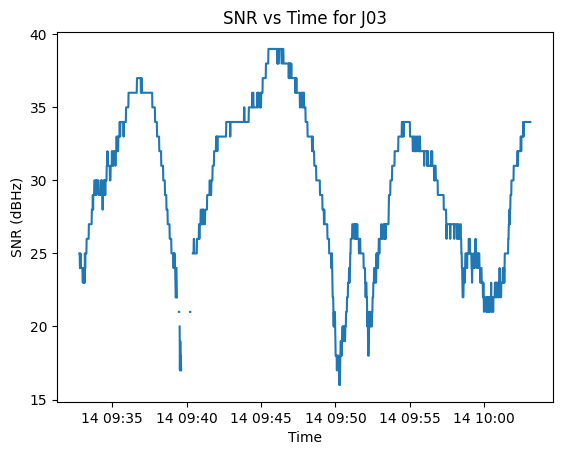

In [48]:
import matplotlib.pyplot as plt

# Extract relevant information
snr_data = rinex_data['S1C']

# Plot SNR values for each satellite
for index in range(len(rinex_data.sv)):
    plt.figure()
    plt.plot(rinex_data['time'].values, snr_data.sel(sv=rinex_data.sv[index]))
    plt.xlabel('Time')
    plt.ylabel('SNR (dBHz)')
    plt.title(f'SNR vs Time for {rinex_data.sv[index].values}')
    plt.show()






some diagrams are missing

No valid SNR values for C02
No valid SNR values for C03
No valid SNR values for C05
No valid SNR values for C06
No valid SNR values for C07
No valid SNR values for C09
No valid SNR values for C10
No valid SNR values for C16
No valid SNR values for C19
No valid SNR values for C21
No valid SNR values for C22
No valid SNR values for C27
No valid SNR values for C29
No valid SNR values for C30


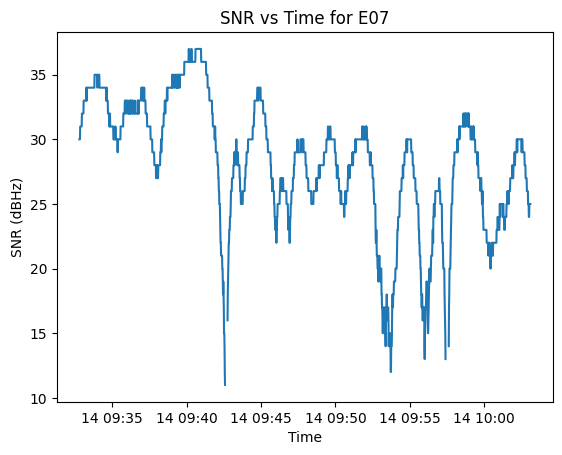

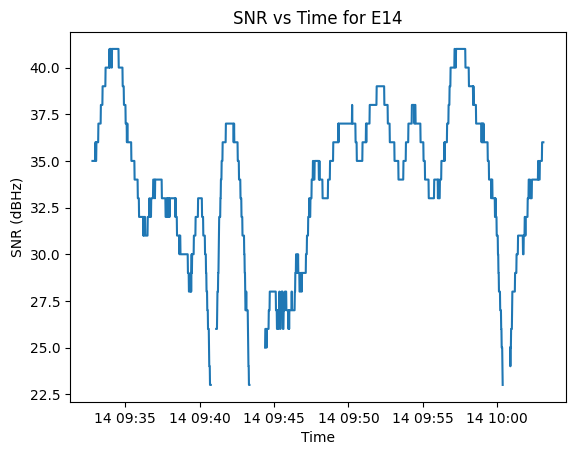

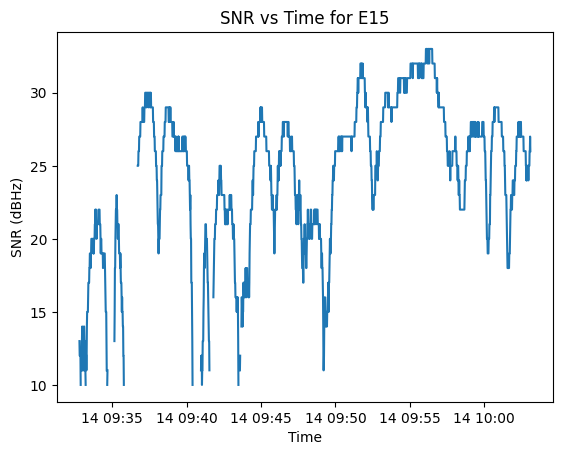

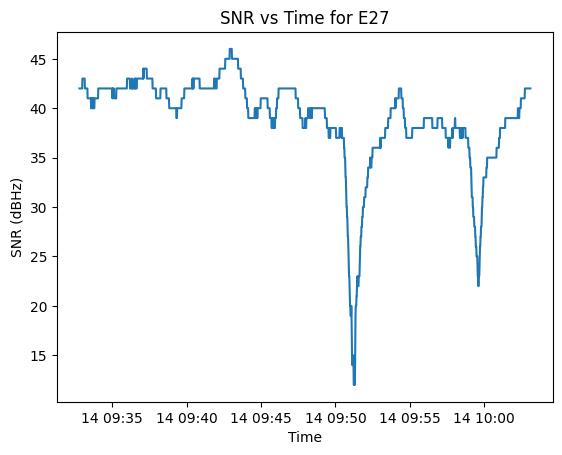

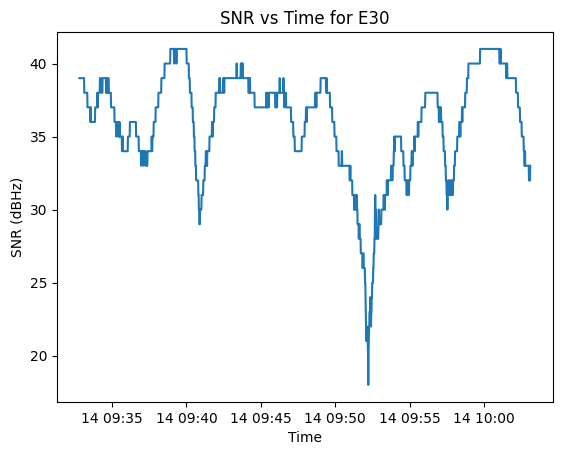

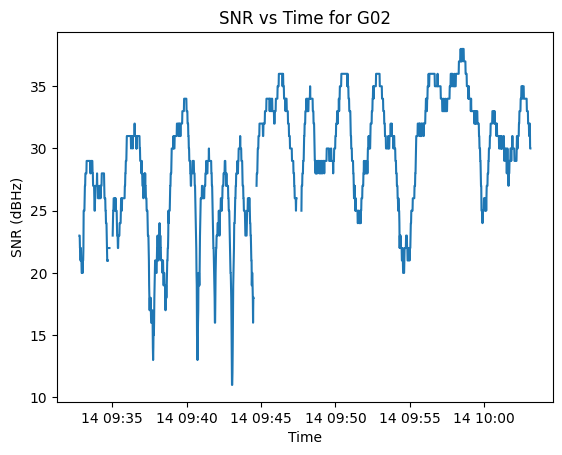

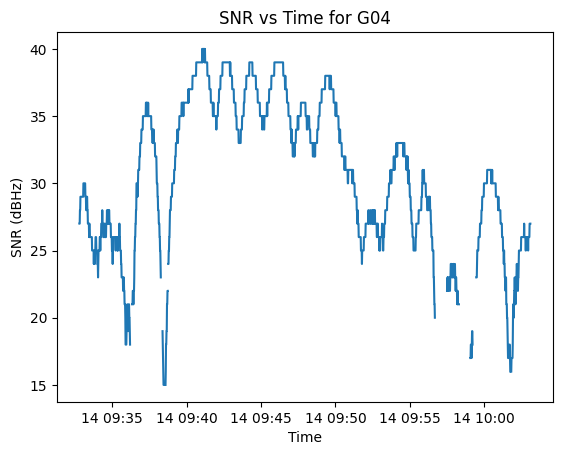

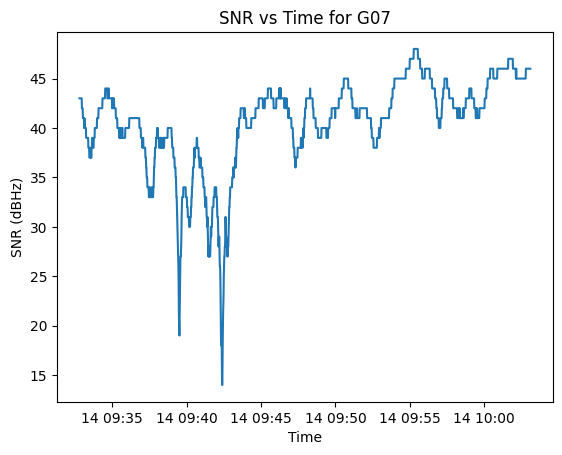

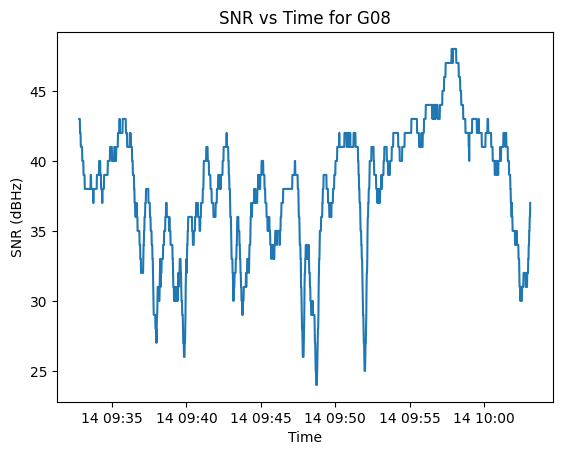

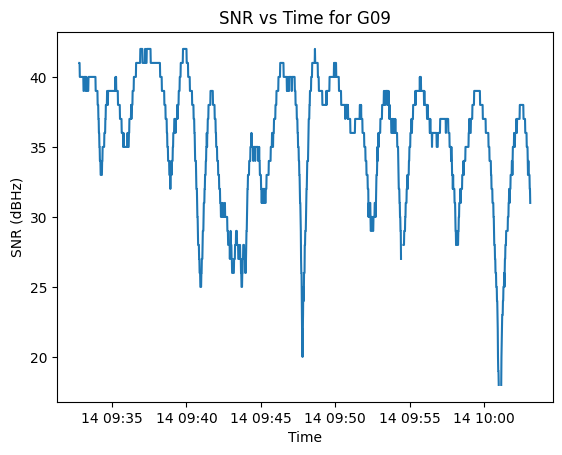

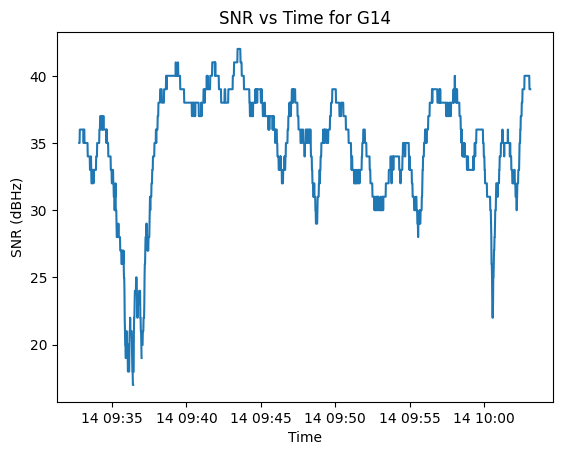

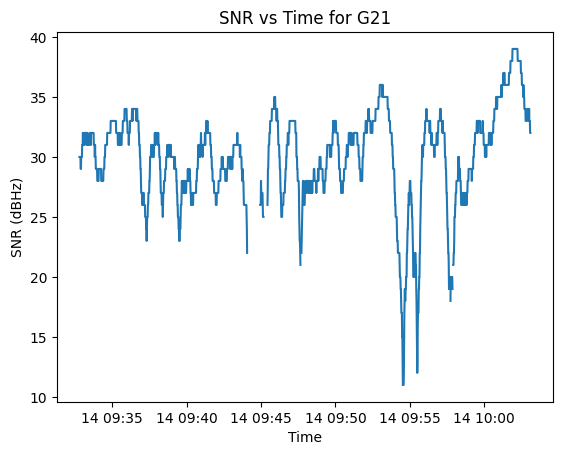

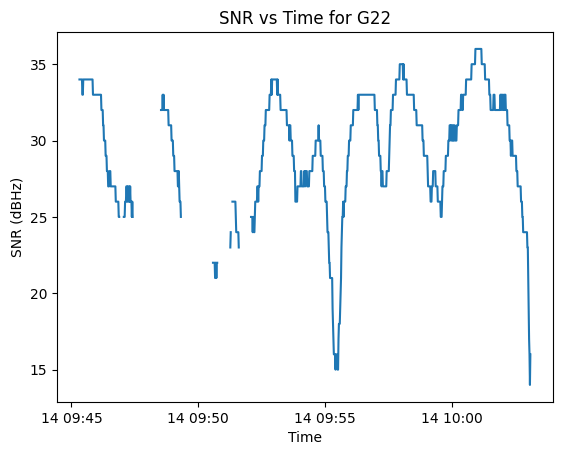

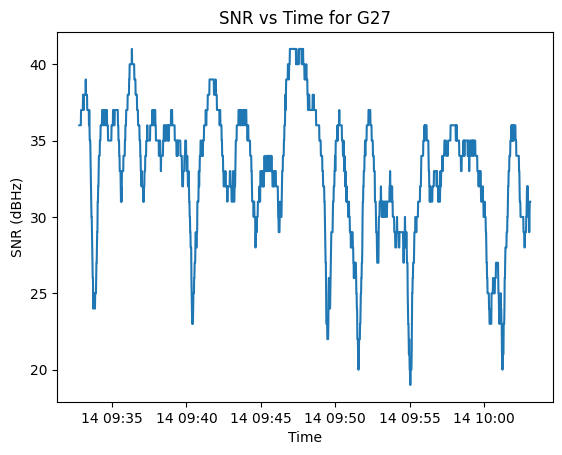

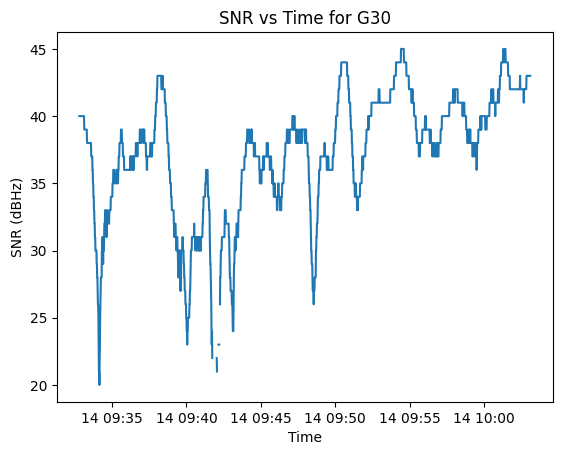

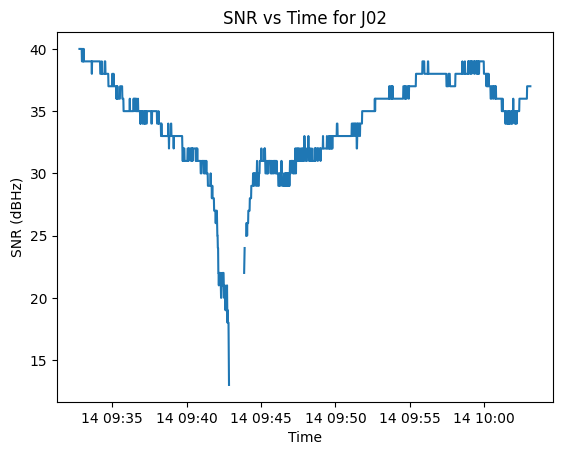

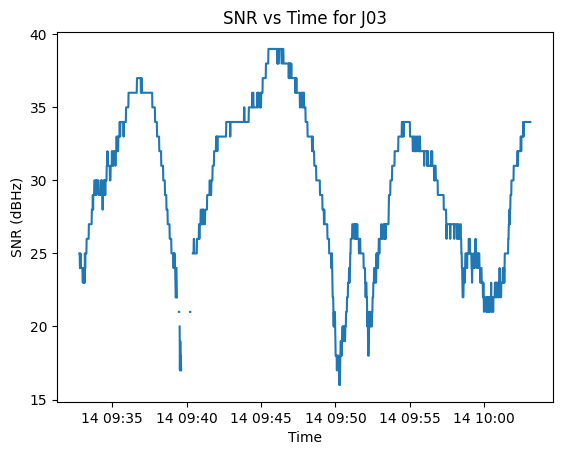

In [49]:
import matplotlib.pyplot as plt

# Extract relevant information
snr_data = rinex_data['S1C']

# Plot SNR values for each satellite
for index in range(len(rinex_data.sv)):
    snr_values = snr_data.sel(sv=rinex_data.sv[index]).values

    # Check for missing or NaN values
    if not any(~np.isnan(snr_values)):
        print(f'No valid SNR values for {rinex_data.sv[index].values}')
        continue

    # Plot if valid data is present
    plt.figure()
    plt.plot(rinex_data['time'].values, snr_values)
    plt.xlabel('Time')
    plt.ylabel('SNR (dBHz)')
    plt.title(f'SNR vs Time for {rinex_data.sv[index].values}')
    plt.show()


Multipath interference occurs in GNSS signals when there are multiple paths that the signal takes to reach the receiver antenna. This phenomenon can impact the Signal-to-Noise Ratio (SNR) values observed in the received signals. Here's a short explanation based on the SNR ratio charts:

1)High SNR Values: High and consistent SNR values indicate a clear signal path with minimal interference. This typically occurs when the direct signal from the satellite reaches the receiver without significant reflection or obstruction.

2)SNR Fluctuations: Fluctuations in SNR values, especially rapid changes, suggest variations in signal strength caused by signal reflections or obstructions. These variations can be attributed to multipath interference.

3)Dips and Peaks: Sudden dips in SNR may indicate moments when the direct signal is temporarily blocked, and the receiver is receiving a reflected signal. Conversely, peaks may signify a period of unobstructed direct signal reception.

4)Consistent Low SNR: Consistently low SNR values across multiple satellites may suggest a pervasive multipath interference issue in the environment. This could be caused by signal reflections off buildings, terrain, or other surfaces.

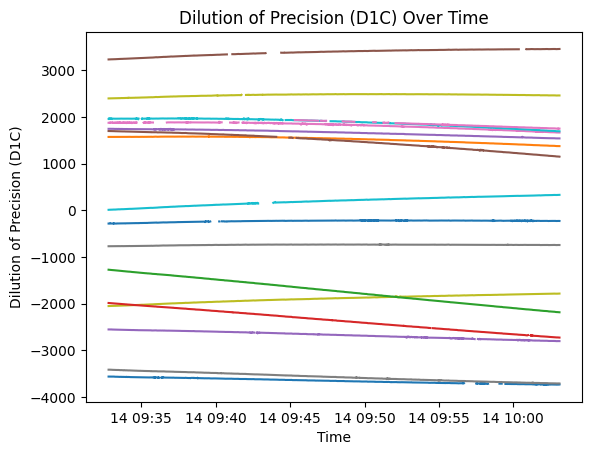

In [51]:
import matplotlib.pyplot as plt

# Extract DOP values from the dataset
dop_values = rinex_data['D1C']

# Plot DOP values over time
plt.plot(rinex_data['time'], dop_values)
plt.xlabel('Time')
plt.ylabel('Dilution of Precision (D1C)')
plt.title('Dilution of Precision (D1C) Over Time')
plt.show()

